In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data=pd.read_excel("/content/Races.xlsx")
data.head()

,Race,Year,Date,Finishers
0,NYC Marathon,2023,2023-05-11 00:00:00,51295
1,Chicago Marathon,2023,2023-08-10 00:00:00,48574
2,Boston Marathon,2023,4/17/23,26600
3,LA Marathon,2023,3/19/23,16973
4,Honolulu Marathon,2023,2023-10-12 00:00:00,15044


In [ ]:
data.dtypes

,0
Race,object
Year,int64
Date,object
Finishers,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Race       641 non-null    object
 1   Year       641 non-null    int64 
 2   Date       641 non-null    object
 3   Finishers  641 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.2+ KB


In [ ]:
data.shape

(641, 4)

In [ ]:
print(data.describe())

         Year     Finishers
count   641.0    641.000000
mean   2023.0    670.798752
std       0.0   3281.848983
min    2023.0      2.000000
25%    2023.0     39.000000
50%    2023.0    106.000000
75%    2023.0    318.000000
max    2023.0  51295.000000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data['Date'])

0     2023-05-11
1     2023-08-10
2     2023-04-17
3     2023-03-19
4     2023-10-12
         ...    
636   2023-03-18
637   2023-10-14
638   2023-09-09
639   2023-10-21
640   2023-10-28
Name: Date, Length: 641, dtype: datetime64[ns]


In [ ]:
missing_dates = data['Date'].isnull().sum()
print(missing_dates)

0


In [ ]:
 data = data.dropna(subset=['Date'])
 print(data)

                           Race  Year       Date  Finishers
0                  NYC Marathon  2023 2023-05-11      51295
1              Chicago Marathon  2023 2023-08-10      48574
2               Boston Marathon  2023 2023-04-17      26600
3                   LA Marathon  2023 2023-03-19      16973
4             Honolulu Marathon  2023 2023-10-12      15044
..                          ...   ...        ...        ...
636  Napa Valley Trail Marathon  2023 2023-03-18          9
637       Run The Rock Marathon  2023 2023-10-14          7
638         American Heroes Run  2023 2023-09-09          5
639            Oregon Trail Run  2023 2023-10-21          5
640   Free State Trail Marathon  2023 2023-10-28          2

[641 rows x 4 columns]


In [ ]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday
print(data['Month'])

0       5
1       8
2       4
3       3
4      10
       ..
636     3
637    10
638     9
639    10
640    10
Name: Month, Length: 641, dtype: int32


In [ ]:
duplicates = data.duplicated().sum()
print(duplicates)

0


In [ ]:
data = data.drop_duplicates()


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Race         0
Year         0
Date         0
Finishers    0
Month        0
Day          0
Weekday      0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Finishers'] = scaler.fit_transform(data[['Finishers']])
print(data['Finishers'])

0      1.000000
1      0.946952
2      0.518550
3      0.330864
4      0.293256
         ...   
636    0.000136
637    0.000097
638    0.000058
639    0.000058
640    0.000000
Name: Finishers, Length: 641, dtype: float64


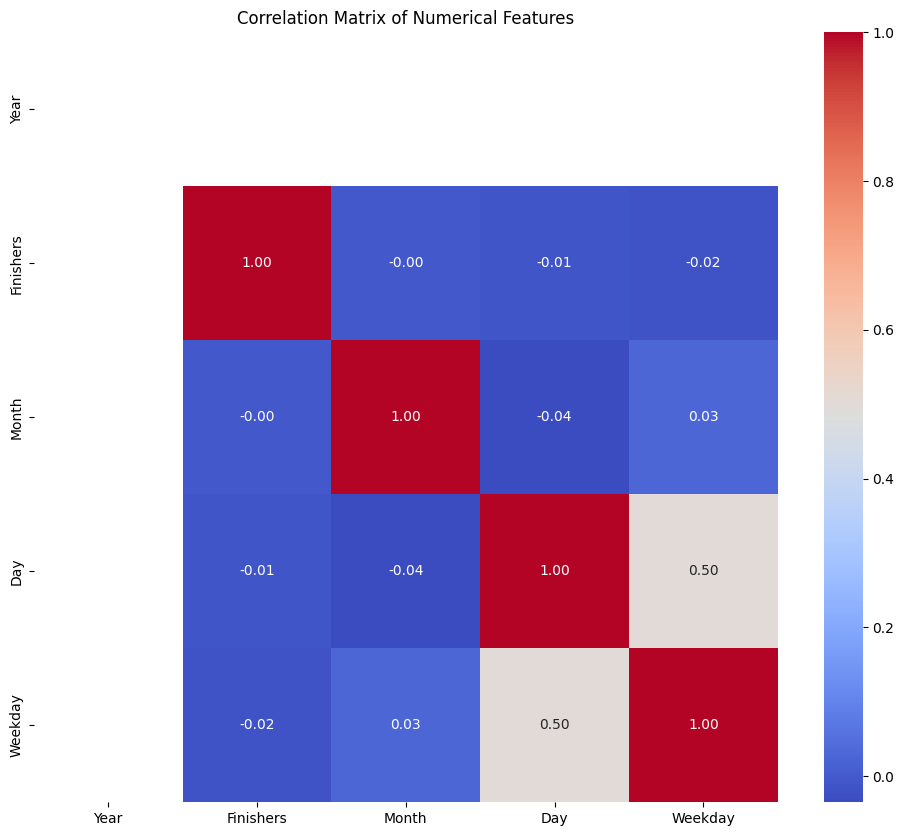

In [ ]:
plt.figure(figsize=(12, 10))
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

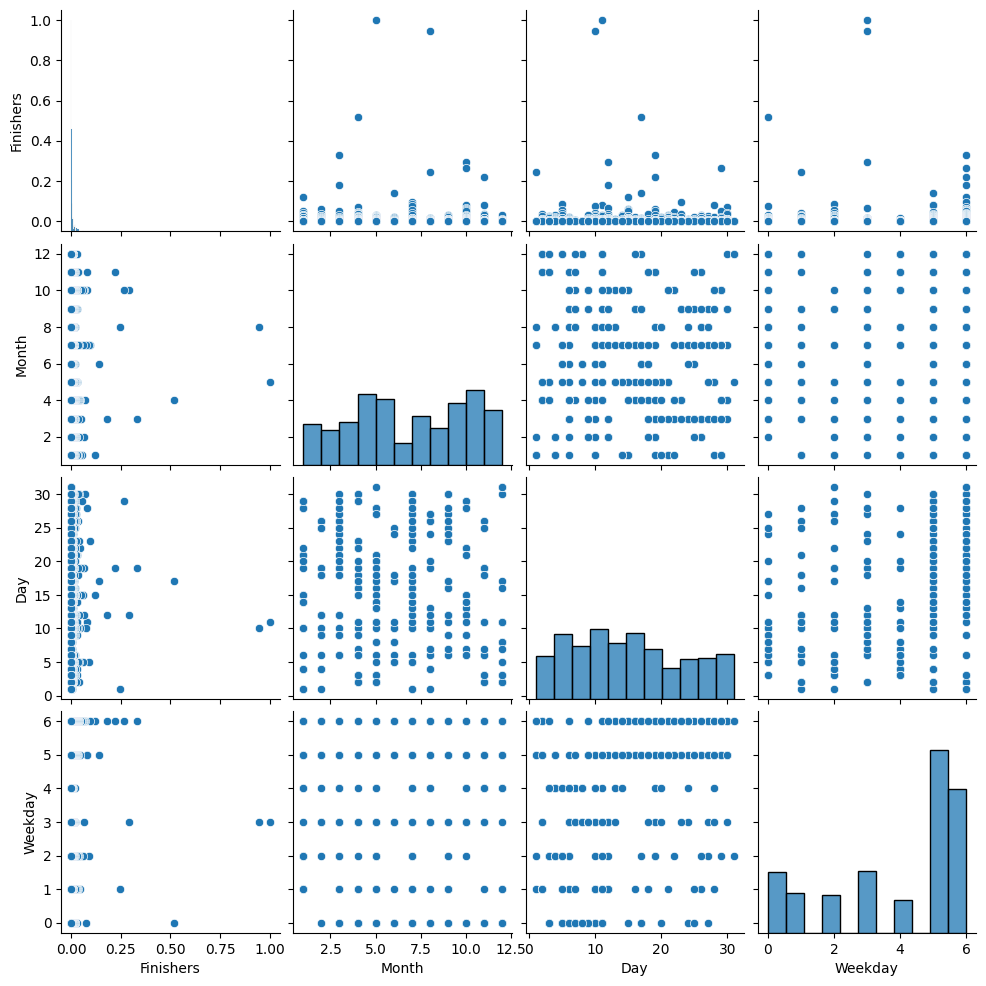

In [ ]:
selected_features = ['Finishers', 'Month', 'Day', 'Weekday']
G=sns.pairplot(data[selected_features],palette='RDBu_r')
plt.show()

In [ ]:
G.map(plt.scatter)
G.add_legend()

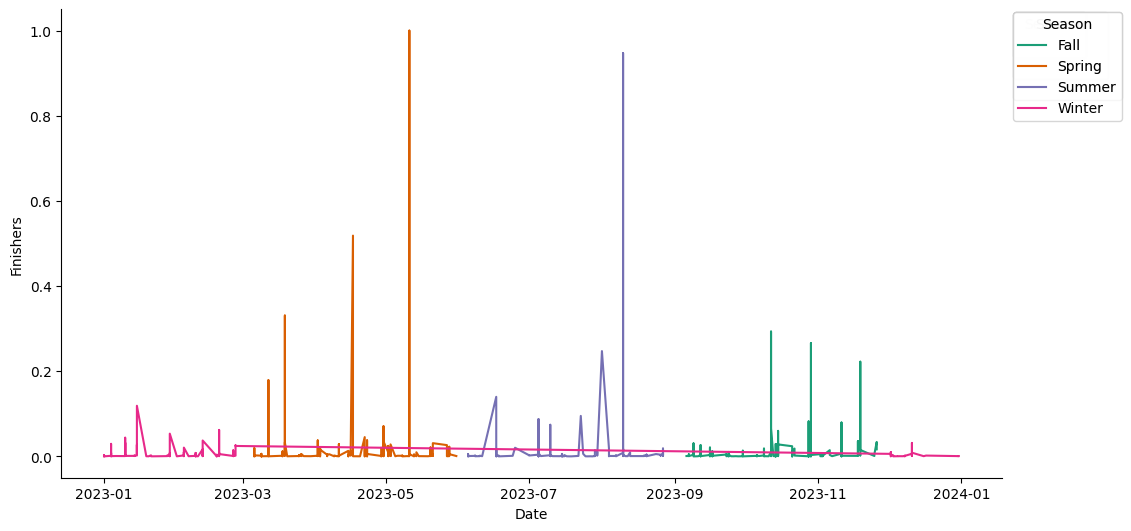

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Finishers']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Finishers')

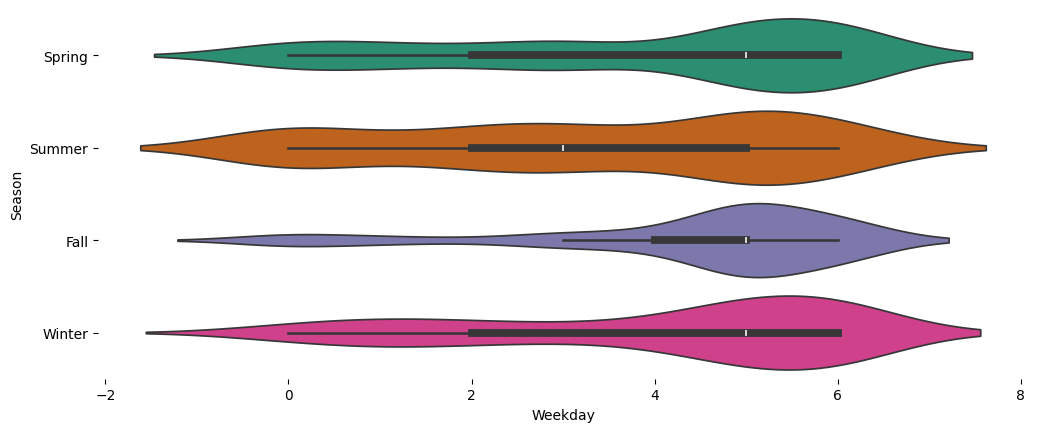

In [ ]:
figsize = (12, 1.2 * len(data['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Weekday', y='Season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

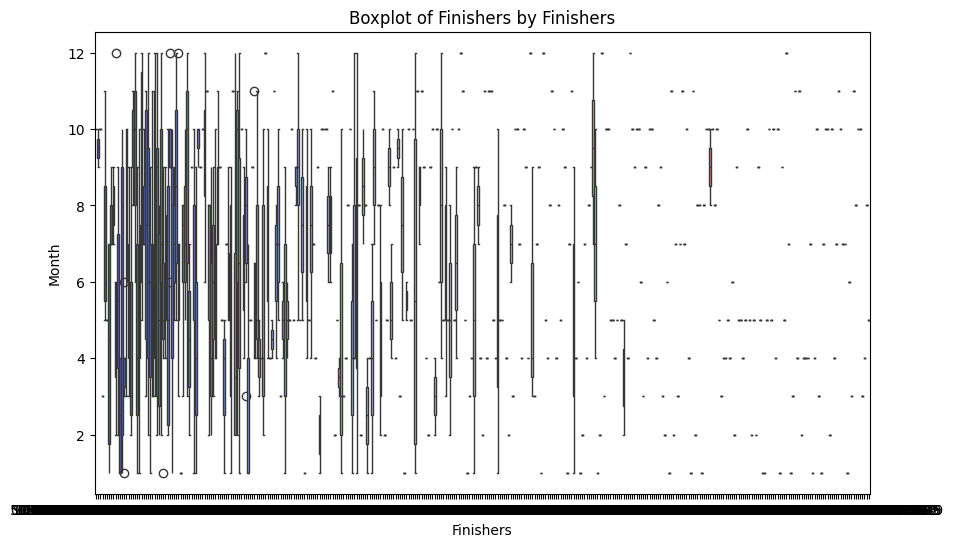

In [ ]:
categorical_features = ['Finishers']
for feature in categorical_features:
  if feature in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='Month', data=data,palette='coolwarm')
    plt.title(f'Boxplot of Finishers by {feature}')
    plt.show()

In [ ]:
top_marathons = data.groupby('Race')['Finishers'].sum().sort_values(ascending=False).head(5).reset_index()

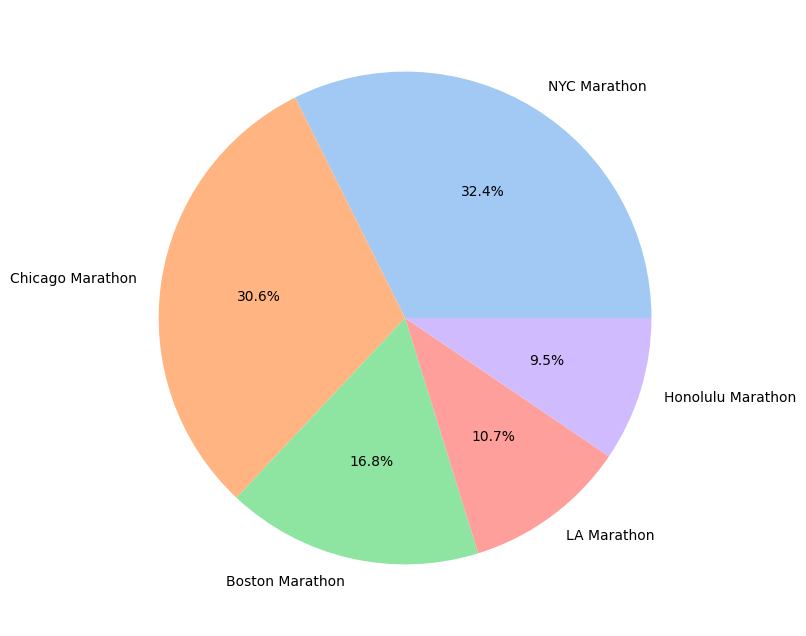

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_marathons['Finishers'], labels=top_marathons['Race'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.show()

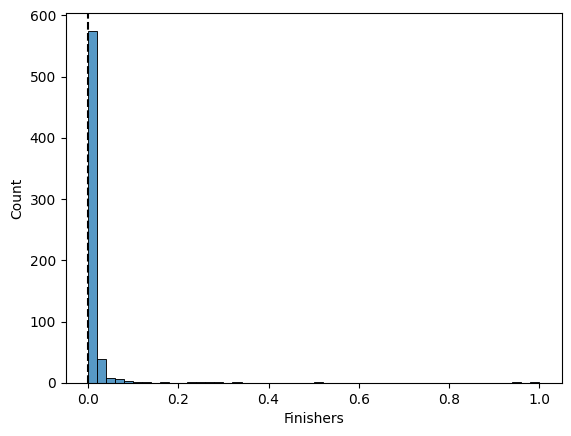

In [ ]:
sns.histplot(data['Finishers'],kde=False,bins=50)
plt.axvline(0,color="k",linestyle="--")

In [ ]:
import plotly.express as px
fig = px.violin(data_frame=data,
                y='Finishers',
                box=True,
                points="all",
                title="Distribution of Finishers",
                color_discrete_sequence=['lightpink'])
fig.show()

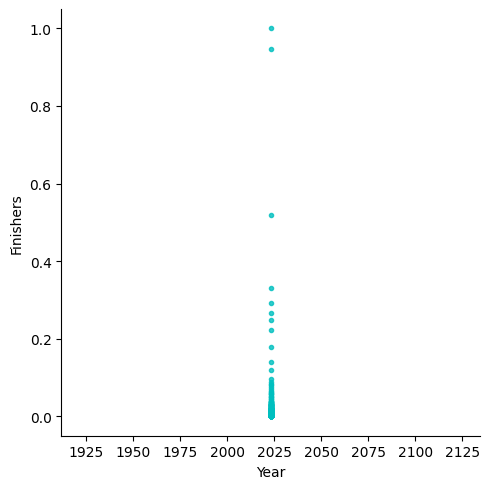

In [ ]:
sns.lmplot(x='Year', y='Finishers', data=data,markers=".",scatter_kws=dict(color='c'))
plt.show()

In [ ]:
fig = px.box(data, y="Finishers", points="all", title="Boxplot of Finishers")
fig.show()

In [ ]:
def categorize_race_size(finishers):
    if finishers < 20000:
        return 'Short'
    elif 20000 <= finishers < 40000:
        return 'Medium'
    else:
        return 'Long'

data['Race_Size_Category'] = data['Finishers'].apply(categorize_race_size)
print(data['Race_Size_Category'])

0      Short
1      Short
2      Short
3      Short
4      Short
       ...  
636    Short
637    Short
638    Short
639    Short
640    Short
Name: Race_Size_Category, Length: 641, dtype: object


In [ ]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data['Season'] = data['Month'].map(seasons)
print(data['Season'])

0      Spring
1      Summer
2      Spring
3      Spring
4        Fall
        ...  
636    Spring
637      Fall
638      Fall
639      Fall
640      Fall
Name: Season, Length: 641, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Race_Encoded'] = le.fit_transform(data['Race'])
data['Season_Encoded'] = le.fit_transform(data['Season'])
data['Race_Size_Category_Encoded'] = le.fit_transform(data['Race_Size_Category'])
print(data['Race_Encoded'])

0      385
1      110
2       77
3      287
4      254
      ... 
636    387
637    499
638     17
639    431
640    193
Name: Race_Encoded, Length: 641, dtype: int64


In [ ]:
data['Season_Encoded']

,Season_Encoded
0,1
1,2
2,1
3,1
4,0
...,...
636,1
637,0
638,0
639,0


In [ ]:
data['Race_Size_Category_Encoded']

,Race_Size_Category_Encoded
0,0
1,0
2,0
3,0
4,0
...,...
636,0
637,0
638,0
639,0


In [ ]:
features = ['Year', 'Month', 'Weekday', 'Race_Encoded', 'Season_Encoded', 'Race_Size_Category_Encoded']
target = 'Finishers'

X = data[features]
y = data[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse

0.0037033159848630353

In [ ]:
r2

-0.4138270912342221

In [ ]:
threshold = y_test.median()
binarizer = Binarizer(threshold=threshold)
y_test_binary = binarizer.fit_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_binary = binarizer.transform(y_pred.reshape(-1, 1)).flatten()

In [ ]:
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)


In [ ]:
accuracy

0.5426356589147286

In [ ]:
precision

0.5206611570247934

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)


RMSE: 0.07194552362543491
R^2 Score: -0.9761189597557465


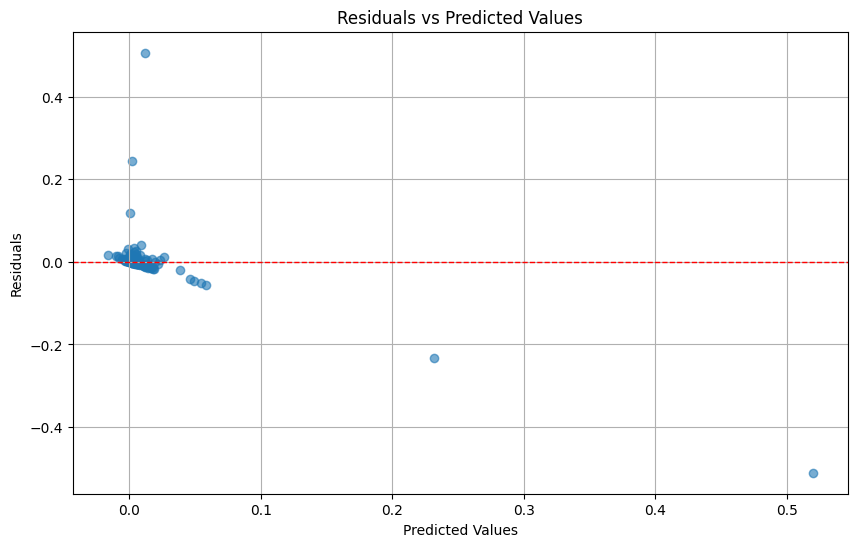

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()